In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_train = pd.read_csv('train.csv')
loan_train.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,0,0,1,1,1,1,1,2,2,1


In [3]:
loan_train.m13.value_counts()

0    115422
1       636
Name: m13, dtype: int64

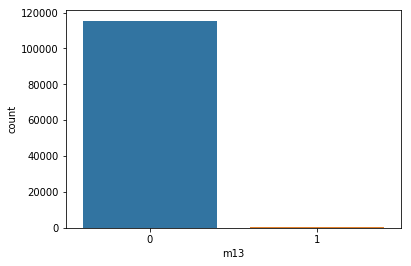

In [4]:
sns.countplot(x='m13',data=loan_train)
plt.show()

Highly biased dataset

In [5]:
loan_test = pd.read_csv('test.csv')
loan_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
loan_train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [7]:
loan_test.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'],
      dtype='object')

In [8]:
def basic_details(df):
    b = pd.DataFrame()
    b['Null Values'] = df.isnull().sum()
    b['Data Type'] = df.dtypes
    b['Unique Values'] = df.nunique()
    return b

In [9]:
basic_details(loan_train)

,Null Values,Data Type,Unique Values
loan_id,0,int64,116058
source,0,object,3
financial_institution,0,object,19
interest_rate,0,float64,923
unpaid_principal_bal,0,int64,646
loan_term,0,int64,140
origination_date,0,object,3
first_payment_date,0,object,4
loan_to_value,0,int64,92
number_of_borrowers,0,float64,2


In [10]:
basic_details(loan_test)

,Null Values,Data Type,Unique Values
loan_id,0,int64,35866
source,0,object,3
financial_institution,0,object,19
interest_rate,0,float64,499
unpaid_principal_bal,0,int64,617
loan_term,0,int64,66
origination_date,0,object,3
first_payment_date,0,object,4
loan_to_value,0,int64,92
number_of_borrowers,0,int64,2


In [11]:
loan_train.shape

(116058, 29)

In [12]:
loan_test.shape

(35866, 28)

In [13]:
loan_train_new = loan_train.copy()
loan_test_new = loan_test.copy()

In [14]:
loan_train_new.corr()['m13']

loan_id                    -0.002982
interest_rate               0.054298
unpaid_principal_bal       -0.017120
loan_term                   0.023502
loan_to_value               0.016357
number_of_borrowers        -0.039979
debt_to_income_ratio        0.038033
borrower_credit_score      -0.094215
insurance_percent           0.005722
co-borrower_credit_score   -0.042651
insurance_type              0.005999
m1                          0.092054
m2                          0.146921
m3                          0.157394
m4                          0.218956
m5                          0.259529
m6                          0.287712
m7                          0.309072
m8                          0.339362
m9                          0.369138
m10                         0.367840
m11                         0.410213
m12                         0.466442
m13                         1.000000
Name: m13, dtype: float64

In [15]:
loan_train_new = pd.get_dummies(loan_train_new)
loan_test_new = pd.get_dummies(loan_test_new)

In [16]:
loan_train_new.corr()['m13']

loan_id                                             -0.002982
interest_rate                                        0.054298
unpaid_principal_bal                                -0.017120
loan_term                                            0.023502
loan_to_value                                        0.016357
number_of_borrowers                                 -0.039979
debt_to_income_ratio                                 0.038033
borrower_credit_score                               -0.094215
insurance_percent                                    0.005722
co-borrower_credit_score                            -0.042651
insurance_type                                       0.005999
m1                                                   0.092054
m2                                                   0.146921
m3                                                   0.157394
m4                                                   0.218956
m5                                                   0.259529
m6      

Dropping features which has low co-relation value with the target variable

In [17]:
loan_train_new.drop(columns='financial_institution_Anderson-Taylor',inplace=True)
loan_train_new.drop(columns='financial_institution_Browning-Hart',inplace=True)
loan_train_new.drop(columns='financial_institution_Chapman-Mcmahon',inplace=True)
loan_train_new.drop(columns='financial_institution_Cole, Brooks and Vincent',inplace=True)
loan_train_new.drop(columns='financial_institution_Edwards-Hoffman',inplace=True)
loan_train_new.drop(columns='financial_institution_Martinez, Duffy and Bird',inplace=True)
loan_train_new.drop(columns='financial_institution_Miller, Mcclure and Allen',inplace=True)
loan_train_new.drop(columns='financial_institution_Nicholson Group',inplace=True)
loan_train_new.drop(columns='financial_institution_OTHER',inplace=True)
loan_train_new.drop(columns='financial_institution_Richards-Walters',inplace=True)
loan_train_new.drop(columns='financial_institution_Richardson Ltd',inplace=True)
loan_train_new.drop(columns='financial_institution_Romero, Woods and Johnson',inplace=True)
loan_train_new.drop(columns='financial_institution_Sanchez, Hays and Wilkerson',inplace=True)
loan_train_new.drop(columns='financial_institution_Sanchez-Robinson',inplace=True)
loan_train_new.drop(columns='financial_institution_Suarez Inc',inplace=True)
loan_train_new.drop(columns='financial_institution_Swanson, Newton and Miller',inplace=True)
loan_train_new.drop(columns='financial_institution_Taylor, Hunt and Rodriguez',inplace=True)
loan_train_new.drop(columns='financial_institution_Thornton-Davis',inplace=True)
loan_train_new.drop(columns='financial_institution_Turner, Baldwin and Rhodes',inplace=True)
loan_train_new.drop(columns='origination_date_2012-01-01',inplace=True)
loan_train_new.drop(columns='origination_date_2012-02-01',inplace=True)
loan_train_new.drop(columns='origination_date_2012-03-01',inplace=True)
loan_train_new.drop(columns='first_payment_date_02/2012',inplace=True)
loan_train_new.drop(columns='first_payment_date_03/2012',inplace=True)
loan_train_new.drop(columns='first_payment_date_04/2012',inplace=True)
loan_train_new.drop(columns='first_payment_date_05/2012',inplace=True)
loan_train_new.drop(columns='loan_id',inplace=True)
# loan_train_new.drop(columns='insurance_percent',inplace=True)
# loan_train_new.drop(columns='insurance_type',inplace=True)
# loan_train_new.drop(columns='unpaid_principal_bal',inplace=True)
# loan_train_new.drop(columns='loan_term',inplace=True)
# loan_train_new.drop(columns='loan_to_value',inplace=True)
# loan_train_new.drop(columns='debt_to_income_ratio',inplace=True)

In [18]:
loan_train_new.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'source_X', 'source_Y', 'source_Z', 'loan_purpose_A23',
       'loan_purpose_B12', 'loan_purpose_C86'],
      dtype='object')

In [19]:
loan_test_new.drop(columns='financial_institution_Anderson-Taylor',inplace=True)
loan_test_new.drop(columns='financial_institution_Browning-Hart',inplace=True)
loan_test_new.drop(columns='financial_institution_Chapman-Mcmahon',inplace=True)
loan_test_new.drop(columns='financial_institution_Cole, Brooks and Vincent',inplace=True)
loan_test_new.drop(columns='financial_institution_Edwards-Hoffman',inplace=True)
loan_test_new.drop(columns='financial_institution_Martinez, Duffy and Bird',inplace=True)
loan_test_new.drop(columns='financial_institution_Miller, Mcclure and Allen',inplace=True)
loan_test_new.drop(columns='financial_institution_Nicholson Group',inplace=True)
loan_test_new.drop(columns='financial_institution_OTHER',inplace=True)
loan_test_new.drop(columns='financial_institution_Richards-Walters',inplace=True)
loan_test_new.drop(columns='financial_institution_Richardson Ltd',inplace=True)
loan_test_new.drop(columns='financial_institution_Romero, Woods and Johnson',inplace=True)
loan_test_new.drop(columns='financial_institution_Sanchez, Hays and Wilkerson',inplace=True)
loan_test_new.drop(columns='financial_institution_Sanchez-Robinson',inplace=True)
loan_test_new.drop(columns='financial_institution_Suarez Inc',inplace=True)
loan_test_new.drop(columns='financial_institution_Swanson, Newton and Miller',inplace=True)
loan_test_new.drop(columns='financial_institution_Taylor, Hunt and Rodriguez',inplace=True)
loan_test_new.drop(columns='financial_institution_Thornton-Davis',inplace=True)
loan_test_new.drop(columns='financial_institution_Turner, Baldwin and Rhodes',inplace=True)
loan_test_new.drop(columns='origination_date_01/02/12',inplace=True)
loan_test_new.drop(columns='origination_date_01/03/12',inplace=True)
loan_test_new.drop(columns='origination_date_01/01/12',inplace=True)
loan_test_new.drop(columns='first_payment_date_Apr-12',inplace=True)
loan_test_new.drop(columns='first_payment_date_Feb-12',inplace=True)
loan_test_new.drop(columns='first_payment_date_Mar-12',inplace=True)
loan_test_new.drop(columns='first_payment_date_May-12',inplace=True)
loan_test_new.drop(columns='loan_id',inplace=True)
# loan_test_new.drop(columns='insurance_percent',inplace=True)
# loan_test_new.drop(columns='insurance_type',inplace=True)
# loan_test_new.drop(columns='unpaid_principal_bal',inplace=True)
# loan_test_new.drop(columns='loan_term',inplace=True)
# loan_test_new.drop(columns='loan_to_value',inplace=True)
# loan_test_new.drop(columns='debt_to_income_ratio',inplace=True)

In [20]:
loan_test_new.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'source_X', 'source_Y', 'source_Z', 'loan_purpose_A23',
       'loan_purpose_B12', 'loan_purpose_C86'],
      dtype='object')

# Feature Engineering

In [21]:
loan_train_new['Average_credit_score'] = (loan_train_new['borrower_credit_score']+loan_train_new['co-borrower_credit_score'])/ loan_train_new['number_of_borrowers']
loan_train_new.drop(columns='number_of_borrowers',inplace=True)
loan_train_new.drop(columns='borrower_credit_score',inplace=True)
loan_train_new.drop(columns='co-borrower_credit_score',inplace=True)
loan_train_new.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,...,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score
0,4.250,214000,360,95,22.0,30.0,0.0,0,0,0,...,0,0,1,0,0,1,0,0,1,694.0
1,4.875,144000,360,72,44.0,0.0,0.0,0,0,0,...,1,0,1,0,1,0,0,1,0,697.0
2,3.250,366000,180,49,33.0,0.0,0.0,0,0,0,...,0,0,1,0,0,1,0,1,0,780.0
3,4.750,135000,360,46,44.0,0.0,0.0,0,0,0,...,1,1,1,1,0,0,0,1,0,635.5
4,4.750,124000,360,80,43.0,0.0,0.0,0,1,2,...,10,11,1,1,0,0,0,0,1,681.0


In [22]:
loan_train_new['loan_term_years'] = loan_train_new['loan_term']/12
loan_train_new.drop(columns='loan_term',inplace=True)
loan_train_new.head()

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years
0,4.250,214000,95,22.0,30.0,0.0,0,0,0,0,...,0,1,0,0,1,0,0,1,694.0,30.0
1,4.875,144000,72,44.0,0.0,0.0,0,0,0,0,...,0,1,0,1,0,0,1,0,697.0,30.0
2,3.250,366000,49,33.0,0.0,0.0,0,0,0,0,...,0,1,0,0,1,0,1,0,780.0,15.0
3,4.750,135000,46,44.0,0.0,0.0,0,0,0,0,...,1,1,1,0,0,0,1,0,635.5,30.0
4,4.750,124000,80,43.0,0.0,0.0,0,1,2,3,...,11,1,1,0,0,0,0,1,681.0,30.0


First, converting R percent to r a decimal
r = R/100 = 3.875%/100 = 0.03875 per year.

Solving our equation:
A = 417000(1 + (0.03875 × 30)) = 901762.5 

A = 901,762.50

The total amount accrued, principal plus interest, from simple interest on a principal of 417,000.00 at a rate of 3.875% per year for 30 years is 901,762.50.

In [26]:
loan_train_new['monthly_installment'] = ((loan_train_new.unpaid_principal_bal)*(1+(loan_train_new.interest_rate)/100))/((loan_train_new.loan_term_years)*12)
loan_train_new.head()

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years,monthly_installment
0,4.250,214000,95,22.0,30.0,0.0,0,0,0,0,...,1,0,0,1,0,0,1,694.0,30.0,619.708333
1,4.875,144000,72,44.0,0.0,0.0,0,0,0,0,...,1,0,1,0,0,1,0,697.0,30.0,419.500000
2,3.250,366000,49,33.0,0.0,0.0,0,0,0,0,...,1,0,0,1,0,1,0,780.0,15.0,2099.416667
3,4.750,135000,46,44.0,0.0,0.0,0,0,0,0,...,1,1,0,0,0,1,0,635.5,30.0,392.812500
4,4.750,124000,80,43.0,0.0,0.0,0,1,2,3,...,1,1,0,0,0,0,1,681.0,30.0,360.805556


In [23]:
loan_test_new['Average_credit_score'] = (loan_test_new['borrower_credit_score']+loan_test_new['co-borrower_credit_score'])/ loan_test_new['number_of_borrowers']
loan_test_new.drop(columns='number_of_borrowers',inplace=True)
loan_test_new.drop(columns='borrower_credit_score',inplace=True)
loan_test_new.drop(columns='co-borrower_credit_score',inplace=True)
loan_test_new.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,...,m10,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score
0,3.875,417000,360,75,20,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,790.0
1,4.500,113000,360,80,33,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,788.5
2,4.500,72000,360,75,34,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,710.0
3,4.125,123000,180,41,24,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,805.5
4,3.250,166000,180,53,12,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,767.5


In [25]:
loan_test_new['loan_term_years'] = loan_test_new['loan_term']/12
loan_test_new.drop(columns='loan_term',inplace=True)
loan_test_new.head()

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m11,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years
0,3.875,417000,75,20,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,790.0,30.0
1,4.500,113000,80,33,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,788.5,30.0
2,4.500,72000,75,34,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,710.0,30.0
3,4.125,123000,41,24,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,805.5,15.0
4,3.250,166000,53,12,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,767.5,15.0


In [27]:
loan_test_new['monthly_installment'] = ((loan_test_new.unpaid_principal_bal)*(1+(loan_test_new.interest_rate)/100))/((loan_test_new.loan_term_years)*12)
loan_test_new.head()

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years,monthly_installment
0,3.875,417000,75,20,0,0,0,0,0,0,...,0,0,1,0,1,0,0,790.0,30.0,1203.218750
1,4.500,113000,80,33,0,0,0,0,0,0,...,0,1,0,0,0,0,1,788.5,30.0,328.013889
2,4.500,72000,75,34,0,0,0,0,0,0,...,0,0,1,0,0,0,1,710.0,30.0,209.000000
3,4.125,123000,41,24,0,0,0,0,0,0,...,0,1,0,0,1,0,0,805.5,15.0,711.520833
4,3.250,166000,53,12,0,0,0,0,0,0,...,0,1,0,0,1,0,0,767.5,15.0,952.194444


# Corelation Heatmap

In [28]:
cor=loan_train_new.corr()

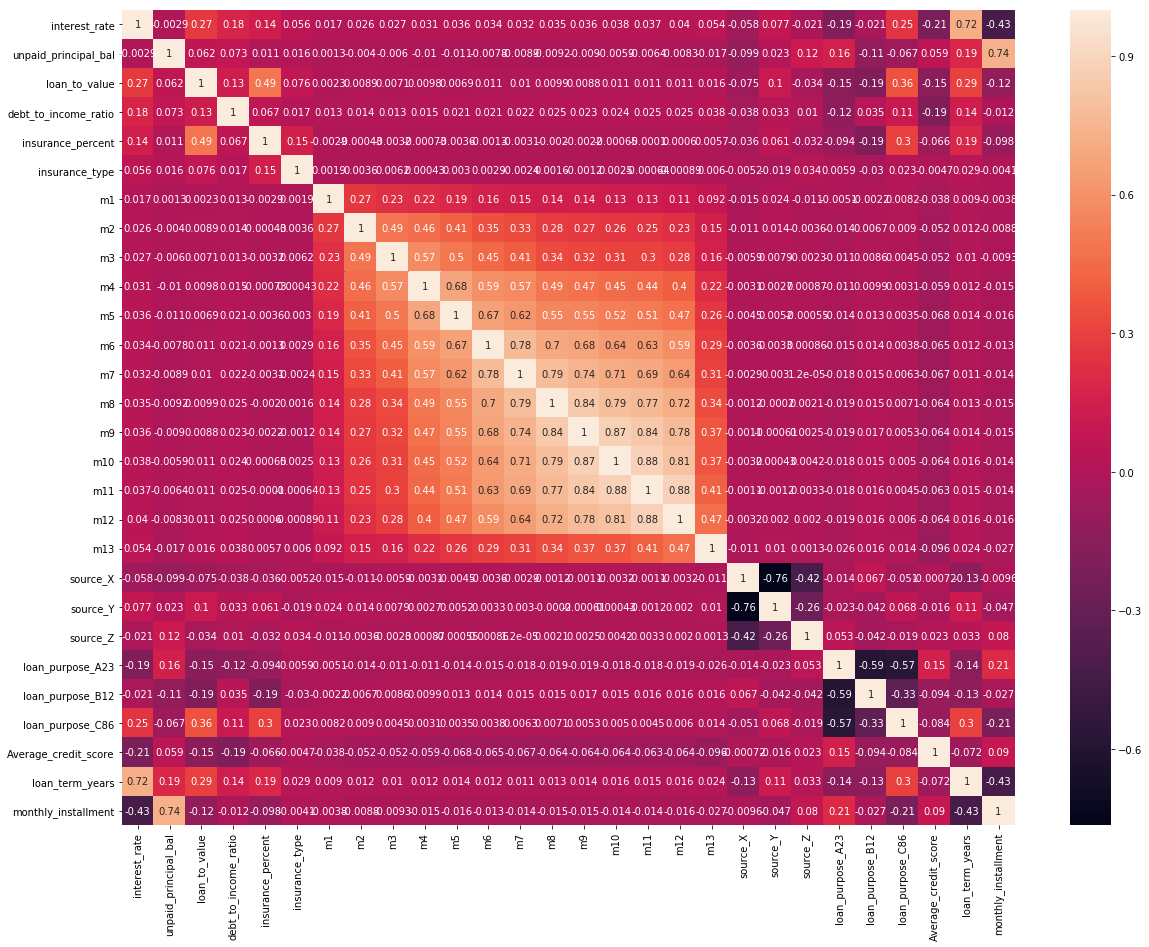

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)
plt.show()

<Figure size 1440x1080 with 0 Axes>

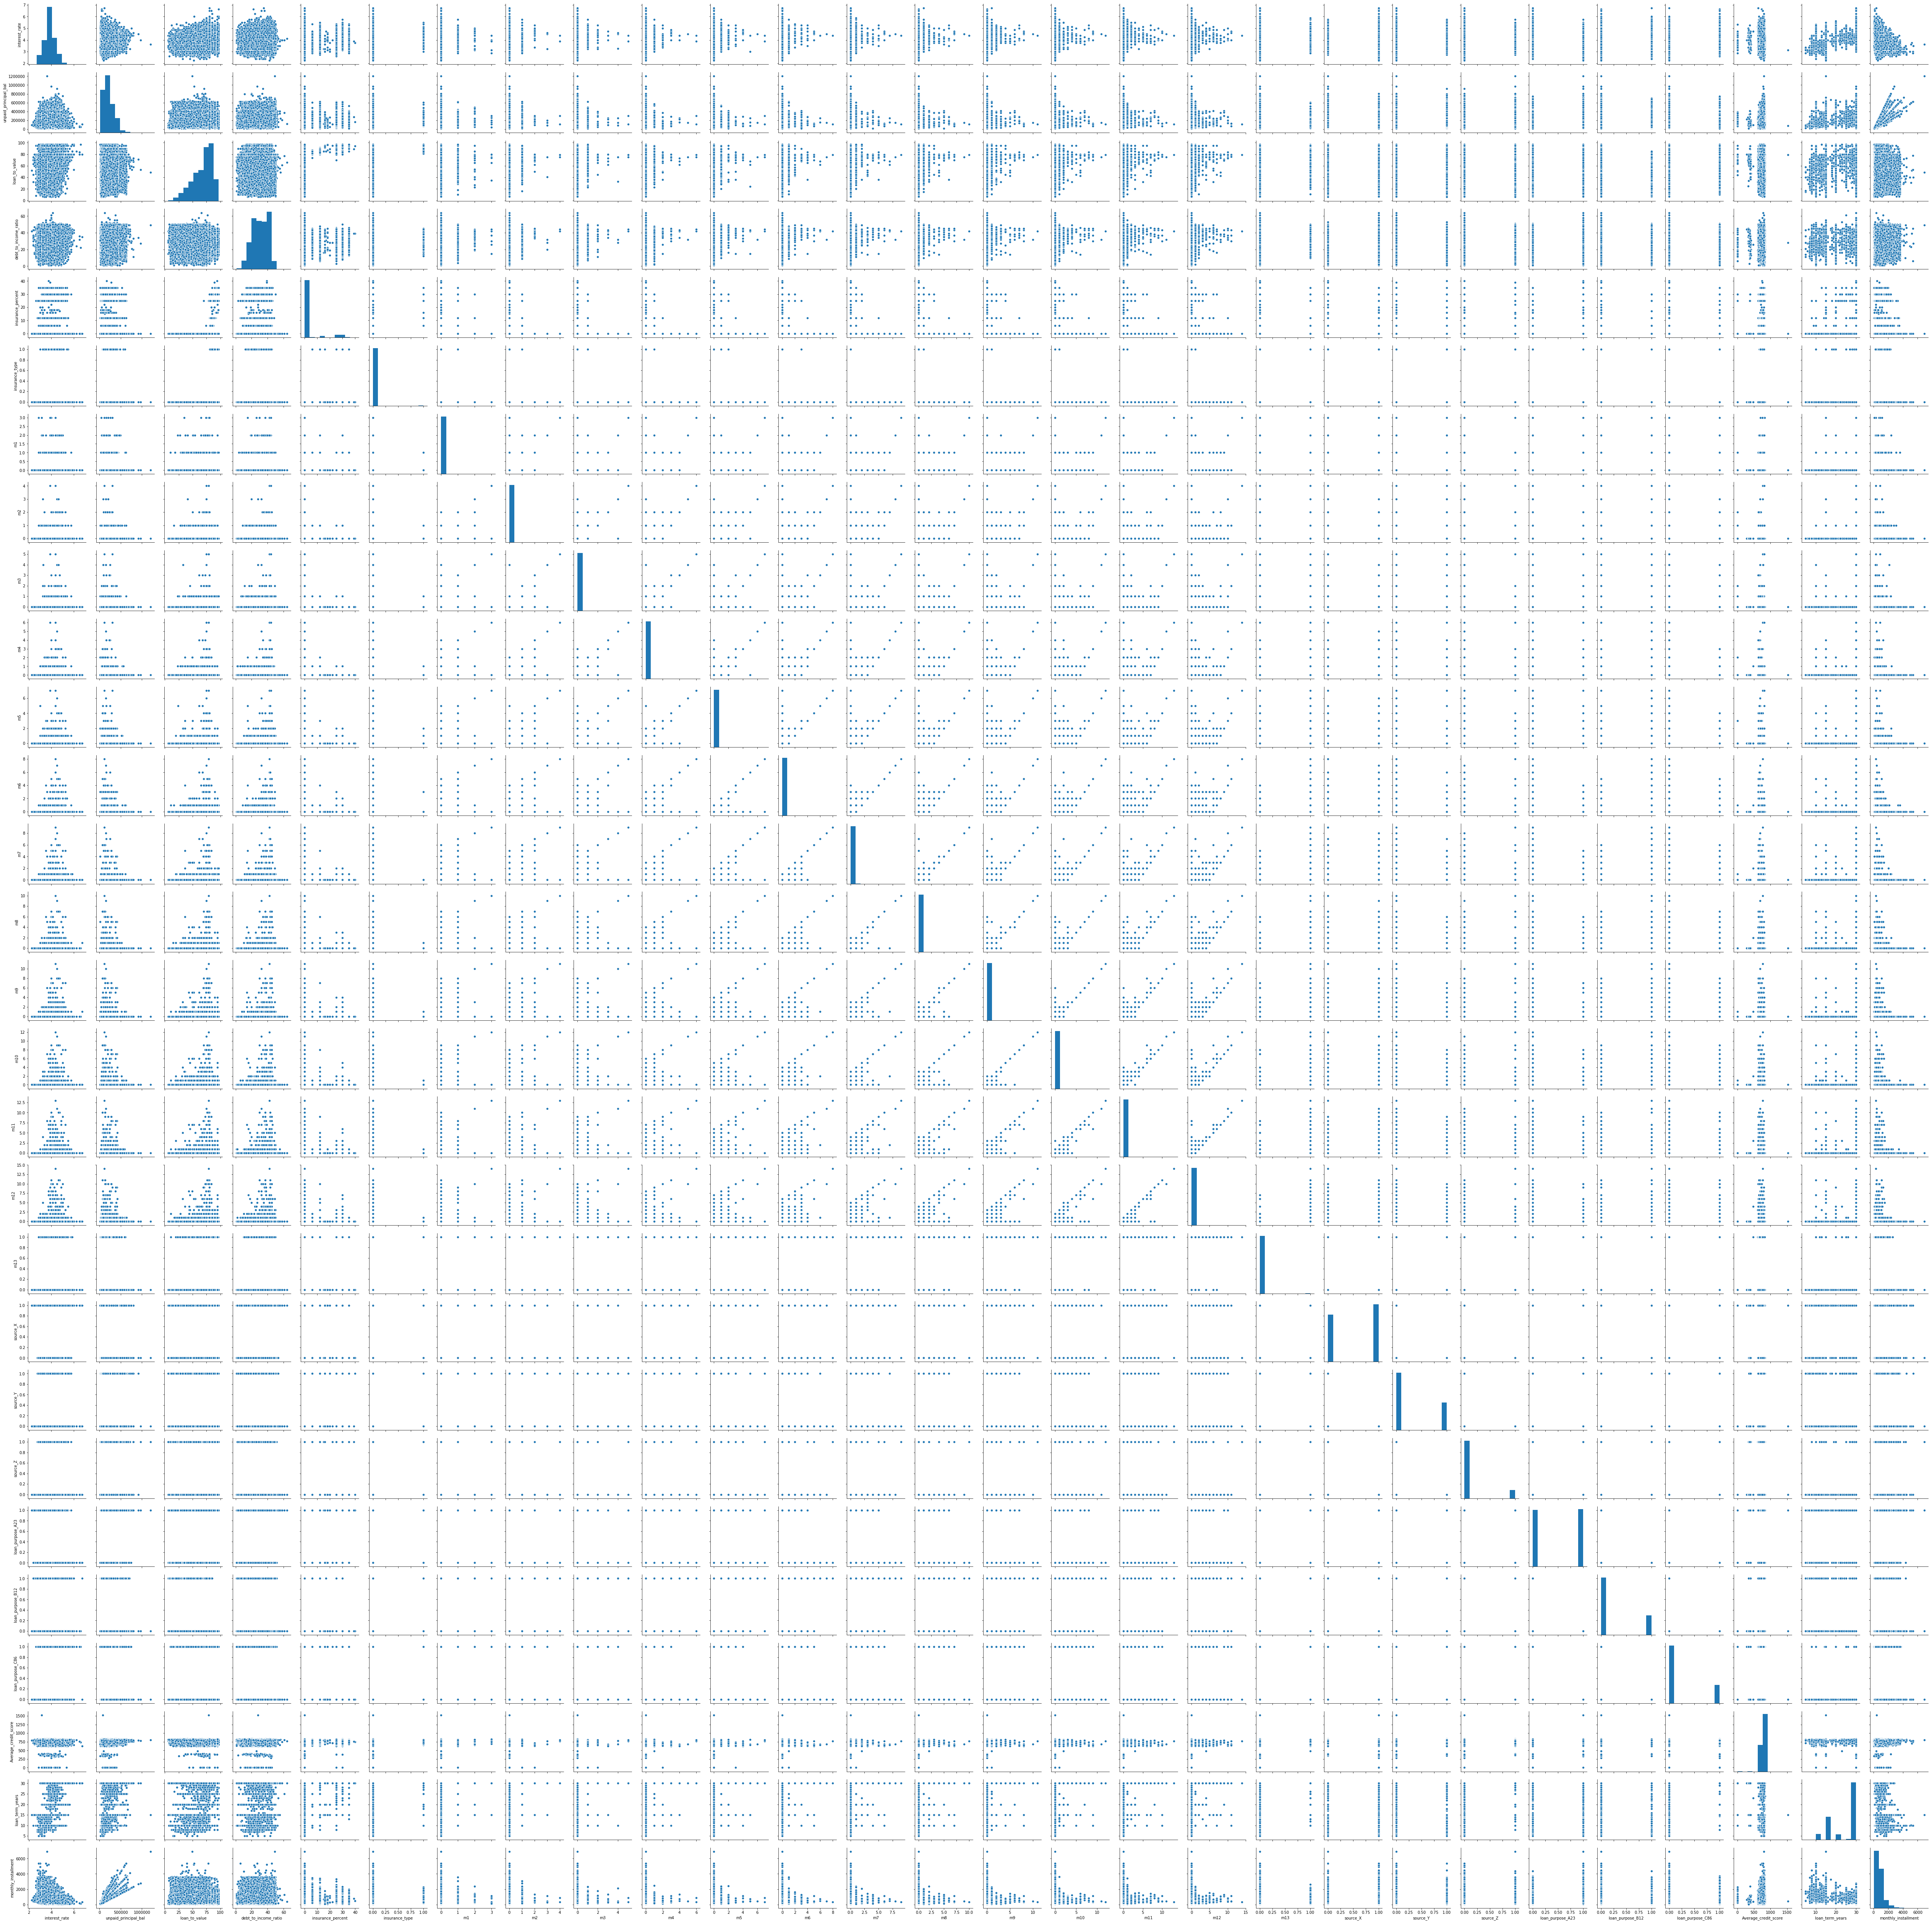

In [30]:
plt.figure(figsize=(20,15))
sns.pairplot(loan_train_new)
plt.show()

In [31]:
loan_train_new.head()

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years,monthly_installment
0,4.250,214000,95,22.0,30.0,0.0,0,0,0,0,...,1,0,0,1,0,0,1,694.0,30.0,619.708333
1,4.875,144000,72,44.0,0.0,0.0,0,0,0,0,...,1,0,1,0,0,1,0,697.0,30.0,419.500000
2,3.250,366000,49,33.0,0.0,0.0,0,0,0,0,...,1,0,0,1,0,1,0,780.0,15.0,2099.416667
3,4.750,135000,46,44.0,0.0,0.0,0,0,0,0,...,1,1,0,0,0,1,0,635.5,30.0,392.812500
4,4.750,124000,80,43.0,0.0,0.0,0,1,2,3,...,1,1,0,0,0,0,1,681.0,30.0,360.805556


In [32]:
loan_test_new.head()

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years,monthly_installment
0,3.875,417000,75,20,0,0,0,0,0,0,...,0,0,1,0,1,0,0,790.0,30.0,1203.218750
1,4.500,113000,80,33,0,0,0,0,0,0,...,0,1,0,0,0,0,1,788.5,30.0,328.013889
2,4.500,72000,75,34,0,0,0,0,0,0,...,0,0,1,0,0,0,1,710.0,30.0,209.000000
3,4.125,123000,41,24,0,0,0,0,0,0,...,0,1,0,0,1,0,0,805.5,15.0,711.520833
4,3.250,166000,53,12,0,0,0,0,0,0,...,0,1,0,0,1,0,0,767.5,15.0,952.194444


In [33]:
x_train= loan_train_new.drop(columns='m13')
y_train= loan_train_new['m13']

In [34]:
x_test = loan_test_new

In [35]:
x_train.apply(zscore)

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years,monthly_installment
0,0.826517,0.050345,1.594300,-0.898419,3.361200,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,...,-0.045276,-1.106044,-0.691643,2.631390,-1.007490,-0.582239,1.764550,-1.869329,0.754428,-0.365433
1,2.182212,-0.560025,0.264177,1.362454,-0.344138,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,...,-0.045276,-1.106044,1.445832,-0.380027,-1.007490,1.717508,-0.566717,-1.795671,0.754428,-0.755283
2,-1.342595,1.375719,-1.065945,0.232018,-0.344138,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,...,-0.045276,-1.106044,-0.691643,2.631390,-1.007490,1.717508,-0.566717,0.242198,-1.250874,2.515887
3,1.911073,-0.638501,-1.239439,1.362454,-0.344138,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,...,5.568680,0.904123,-0.691643,-0.380027,-1.007490,1.717508,-0.566717,-3.305658,0.754428,-0.807249
4,1.911073,-0.734416,0.726829,1.259687,-0.344138,-0.057163,-0.050458,19.418760,36.047883,48.226620,...,61.708245,0.904123,-0.691643,-0.380027,-1.007490,-0.582239,1.764550,-2.188513,0.754428,-0.869574
5,1.097656,-0.507707,0.726829,1.567988,-0.344138,-0.057163,15.734058,-0.040072,-0.035599,-0.035069,...,-0.045276,-1.106044,1.445832,-0.380027,-1.007490,-0.582239,1.764550,-2.335829,0.754428,-0.725304
6,0.284239,-1.301188,1.594300,1.362454,3.361200,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,...,-0.045276,0.904123,-0.691643,-0.380027,-1.007490,-0.582239,1.764550,-1.157302,0.754428,-1.240249
7,1.368795,0.965899,-0.314137,1.465221,-0.344138,-0.057163,-0.050458,19.418760,-0.035599,-0.035069,...,-0.045276,-1.106044,1.445832,-0.380027,0.992566,-0.582239,-0.566717,-2.900539,0.085994,0.591578
8,0.284239,2.718532,0.495503,0.437552,-0.344138,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,...,5.568680,0.904123,-0.691643,-0.380027,-1.007490,-0.582239,1.764550,0.929672,0.754428,1.353017
9,0.284239,0.050345,1.594300,1.054153,3.361200,-0.057163,-0.050458,-0.040072,-0.035599,-0.035069,...,11.182637,0.904123,-0.691643,-0.380027,0.992566,-0.582239,-0.566717,-1.697460,0.754428,-0.368327


In [36]:
x_test.apply(zscore)

,interest_rate,unpaid_principal_bal,loan_to_value,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,...,m12,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,Average_credit_score,loan_term_years,monthly_installment
0,0.004669,1.826422,0.441346,-1.106607,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,-1.104776,1.441469,-0.378723,1.002289,-0.587246,-0.569215,0.490438,0.748843,0.794693
1,1.361798,-0.827206,0.731259,0.230015,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,0.905161,-0.693737,-0.378723,-0.997716,-0.587246,1.756805,0.453392,0.748843,-0.934495
2,1.361798,-1.185097,0.441346,0.332833,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,-1.104776,1.441469,-0.378723,-0.997716,-0.587246,1.756805,-1.485350,0.748843,-1.169637
3,0.547520,-0.739916,-1.530069,-0.695338,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,0.905161,-0.693737,-0.378723,1.002289,-0.587246,-0.569215,0.873247,-1.266889,-0.176780
4,-1.352460,-0.364567,-0.834276,-1.929143,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,0.905161,-0.693737,-0.378723,1.002289,-0.587246,-0.569215,-0.065252,-1.266889,0.298731
5,-0.538183,1.817693,-0.138482,-1.209424,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,-1.104776,1.441469,-0.378723,-0.997716,-0.587246,1.756805,-0.126996,0.748843,0.783285
6,-0.809608,0.560711,0.557311,-2.340412,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,0.905161,-0.693737,-0.378723,1.002289,-0.587246,-0.569215,0.194070,-1.266889,1.507508
7,-1.623886,-0.416941,-0.776293,-1.312241,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,0.905161,-0.693737,-0.378723,-0.997716,1.702865,-0.569215,-0.411015,-1.938800,1.134091
8,-1.352460,0.246466,-1.472086,0.230015,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,0.905161,-0.693737,-0.378723,1.002289,-0.587246,-0.569215,0.601576,-1.266889,1.092051
9,1.090372,-0.958142,0.731259,0.538467,-0.339942,-0.056468,-0.04693,-0.03923,-0.034339,-0.033889,...,-0.045659,-1.104776,-0.693737,2.640453,-0.997716,-0.587246,1.756805,-0.818521,0.748843,-1.021195


# KNN

In [ ]:
param_grid = {
    'n_neighbors':range(5,25,2) ,
    'weights' :['uniform','distance'] ,
    'p' :[1,2]
    
}

n_folds = 5

# Instantiate the grid search model
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

In [ ]:
print("best accuracy", grid_search.best_score_)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# fitting the model
knn.fit(x_train,y_train)

In [ ]:
# predict the response
pred_knn = knn.predict(x_test)

In [ ]:
upload_knn = pd.DataFrame()
upload_knn['loan_id'] = loan_test.loan_id
upload_knn['m13'] = pred_knn
print((upload_knn['m13']==1).sum())
upload_knn

In [ ]:
upload_knn.to_csv('pred_knn.csv',index=False)

As there are no predictions out from the the KNClassifiers, hence we go to other Classifiers

# Naive Bayes

In [ ]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

In [ ]:
pred_gnb = gnb.predict(x_test)

In [ ]:
upload_gnb = pd.DataFrame()
upload_gnb['loan_id'] = loan_test.loan_id
upload_gnb['m13'] = pred_gnb
print((upload_gnb['m13']==1).sum())
upload_gnb

In [ ]:
upload_gnb.to_csv('pred_gnb.csv',index=False)

# Bernoulli NB

In [37]:
bnb = BernoulliNB()

bnb.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [38]:
pred_bnb = bnb.predict(x_test)

In [39]:
upload_bnb = pd.DataFrame()
upload_bnb['loan_id'] = loan_test.loan_id
upload_bnb['m13'] = pred_bnb
print((upload_bnb['m13']==1).sum())
upload_bnb

171


,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [40]:
upload_bnb.to_csv('pred_bnb.csv',index=False)

# Multinomial NB

In [ ]:
mnb = MultinomialNB()

mnb.fit(x_train, y_train)

In [ ]:
pred_mnb = mnb.predict(x_test)

In [ ]:
upload_mnb = pd.DataFrame()
upload_mnb['loan_id'] = loan_test.loan_id
upload_mnb['m13'] = pred_mnb
print((upload_mnb['m13']==1).sum())
upload_mnb

In [ ]:
upload_mnb.to_csv('pred_mnb.csv',index=False)

# Decision Tree

In [ ]:
param_grid = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"],
    'random_state':range(0,11)
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

In [ ]:
print("best accuracy", grid_search.best_score_)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
dtc = DecisionTreeClassifier( criterion='gini', max_depth=5,min_samples_leaf=50, min_samples_split=50,random_state=0)

dtc.fit(x_train, y_train)

In [ ]:
pred_dtc = dtc.predict(x_test)

In [ ]:
upload_dtc = pd.DataFrame()
upload_dtc['loan_id'] = loan_test.loan_id
upload_dtc['m13'] = pred_dtc
print((upload_dtc['m13']==1).sum())
upload_dtc

In [ ]:
upload_dtc.to_csv('pred_dtc.csv',index=False)

# Random Forest

In [ ]:
param_grid = {'n_estimators': range(10, 50, 10),
                'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
             }

n_folds = 5

# Instantiate the grid search model
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

In [ ]:
print("best accuracy", grid_search.best_score_)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
rfc = RandomForestClassifier(n_estimators =10,
                 max_depth=10,
    min_samples_leaf=50,
    min_samples_split=100,
    criterion='gini',
    random_state=1
    )

In [ ]:
rfc.fit(x_train, y_train)

In [ ]:
pred_rfc = rfc.predict(x_test) 

In [ ]:
upload_rfc = pd.DataFrame()
upload_rfc['loan_id'] = loan_test.loan_id
upload_rfc['m13'] = pred_rfc
print((upload_rfc['m13']==1).sum())
upload_rfc

In [ ]:
upload_rfc.to_csv('pred_rfc.csv',index=False)

# Bagging Classifier

In [ ]:
param_grid = {
    'n_estimators':range(10,50,5),
    'bootstrap':['True','False'],
    'random_state':[0,1,45,100]
    }

n_folds = 5

# Instantiate the grid search model
bagc = BaggingClassifier()
grid_search = GridSearchCV(estimator = bagc, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

In [ ]:
print("best accuracy", grid_search.best_score_)

In [ ]:
print(grid_search.best_estimator_)

In [ ]:
bagc = BaggingClassifier(n_estimators=500,bootstrap=True,random_state=1)

In [ ]:
bagc.fit(x_train, y_train)

In [ ]:
pred_bagc = bagc.predict(x_test) 

In [ ]:
upload_bagc = pd.DataFrame()
upload_bagc['loan_id'] = loan_test.loan_id
upload_bagc['m13'] = pred_bagc
print((upload_bagc['m13']==1).sum())
upload_bagc

In [ ]:
upload_bagc.to_csv('pred_bagc.csv',index=False)

# AdaBoost Classifier

In [41]:
lr = LogisticRegression()

In [48]:
abcl_lr = AdaBoostClassifier(base_estimator=bnb,n_estimators= 500,random_state=1,learning_rate=0.3)

abcl_lr.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
          learning_rate=0.3, n_estimators=500, random_state=1)

In [49]:
pred_abcl_lr = abcl_lr.predict(x_test) 

In [50]:
upload_abcl_lr = pd.DataFrame()
upload_abcl_lr['loan_id'] = loan_test.loan_id
upload_abcl_lr['m13'] = pred_abcl_lr
print((upload_abcl_lr['m13']==1).sum())
upload_abcl_lr

77


,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
upload_abcl_lr.to_csv('pred_abcl_lr.csv',index=False)

# Gradient Booster

In [ ]:
gbcl = GradientBoostingClassifier(n_estimators = 500)

gbcl.fit(x_train,y_train)

In [ ]:
pred_gbcl = gbcl.predict(x_test)

In [ ]:
upload_gbcl = pd.DataFrame()
upload_gbcl['loan_id'] = loan_test.loan_id
upload_gbcl['m13'] = pred_gbcl
print((upload_gbcl['m13']==1).sum())
upload_gbcl

In [ ]:
upload_gbcl.to_csv('pred_gbcl.csv',index=False)